<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path='df_str_replaced.csv'
df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [5]:
import seaborn as sns
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

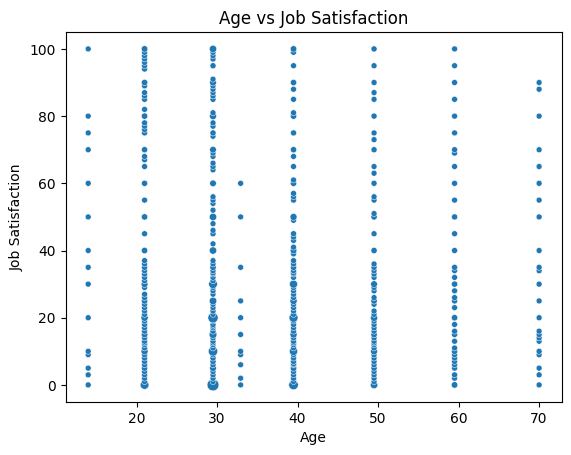

In [55]:
## Write your code here
df2 = df[['Age', 'Employment', 'YearsCodePro', 'LanguageHaveWorkedWith', 'Country', 'JobSatPoints_6', 'ConvertedCompYearly']].copy()
df2['Age_num'] = df2['Age'].replace({
    '25-34 years old': '29.5',
    '35-44 years old': '39.5',
    '18-24 years old': '21',
    '45-54 years old': '49.5',
    '55-64 years old': '59.5',
    'Under 18 years old': '14',
    '65 years or older': '70',
    'Prefer not to say': '0',
}).astype(float)
a_mean = df2[df2['Age_num'] != 0]['Age_num'].mean()
df2.loc[:,'Age_num'] = df2['Age_num'].replace(0, a_mean)
weighted = df2.groupby(['Age_num', 'JobSatPoints_6']).count().reset_index()
sns.scatterplot(data=weighted, x='Age_num', y='JobSatPoints_6', size='ConvertedCompYearly', legend=False)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


μ + 3σ: 646426.2065215341
Q3 + 1.5 IQR = 220860.75


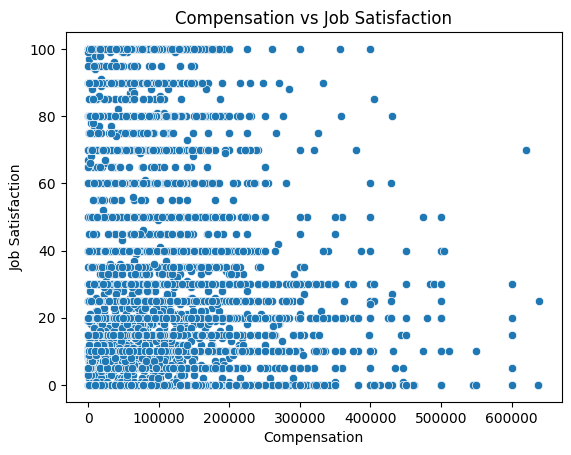

In [35]:
## Write your code here
# removing extreme outliers
stats = df['ConvertedCompYearly'].describe()

# 3σ threshold
threshold = stats['mean']+stats['std']*3
print('μ + 3σ:', threshold)

# Q3+1.5IQR threshold
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print('Q3 + 1.5 IQR =', upper_bound)

# scatter plot for compensation < μ + 3σ
sns.scatterplot(data=df2[df2['ConvertedCompYearly'] < threshold], x='ConvertedCompYearly', y='JobSatPoints_6')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


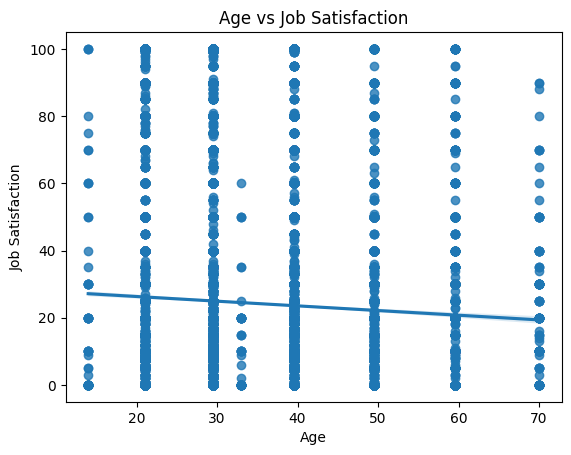

In [34]:
## Write your code here
sns.regplot(data=df2, x='Age_num', y='JobSatPoints_6')
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


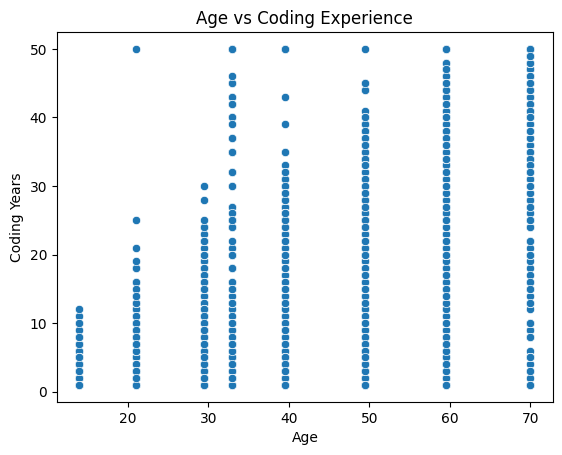

In [42]:
## Write your code here
df2['CodingYears'] = df2['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
sns.scatterplot(data=df2, x='Age_num', y='CodingYears')
plt.title('Age vs Coding Experience')
plt.xlabel('Age')
plt.ylabel('Coding Years')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


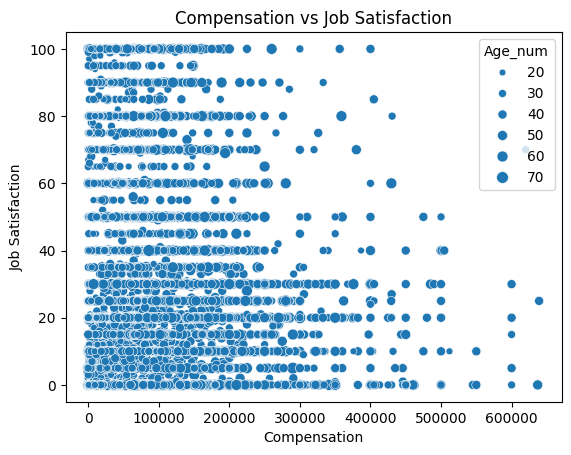

In [31]:
## Write your code here
sns.scatterplot(data=df2[df2['ConvertedCompYearly'] < threshold], x='ConvertedCompYearly', y='JobSatPoints_6', size='Age_num')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


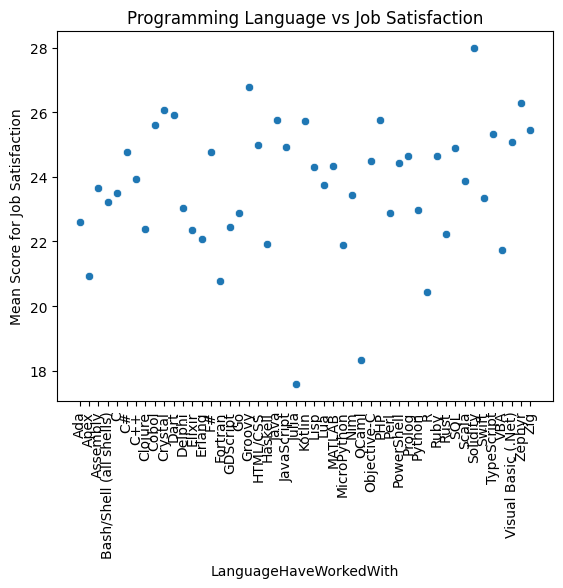

In [40]:
## Write your code here
lang = 'LanguageHaveWorkedWith'
# reshape lang type from wide to long format (i.e. separate rows)
df3 = df[[lang, 'JobSatPoints_6']].copy()
df3[lang] = df[lang].str.split(';')
df3 = df3.explode(lang)
df3[lang] = df3[lang].str.strip()
# a bar chart would be more useful; here it's hard to tell which dot represents which language
sns.scatterplot(data=df3.groupby(lang)['JobSatPoints_6'].mean())
#sns.scatterplot(data=df3, x=lang, y='JobSatPoints_6')
plt.xticks(rotation=90)
plt.ylabel('Mean Score for Job Satisfaction')
plt.title('Programming Language vs Job Satisfaction')
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


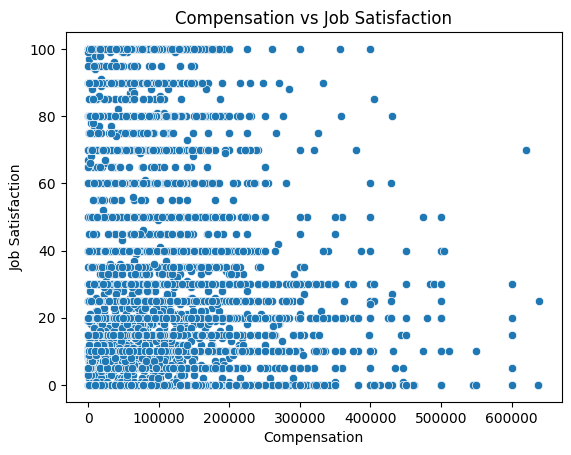

In [60]:
## Write your code here
# it's futile to differentiate between employment types by markers as there is too much overlap
sns.scatterplot(data=df2[df2['ConvertedCompYearly'] < threshold], x='ConvertedCompYearly', y='JobSatPoints_6')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


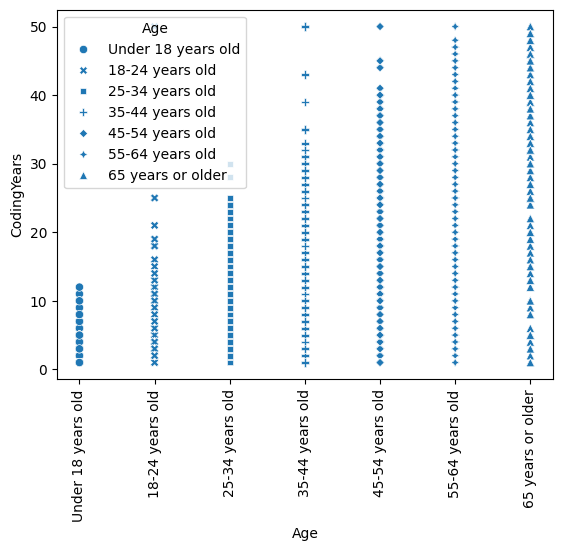

In [54]:
## Write your code here
import pandas as pd
a_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df2['Age'] = pd.Categorical(df2['Age'], categories=a_order, ordered=True)
# it's futile to show hue='Country' because there are too many countries for meaningful identification
sns.scatterplot(data=df2, x='Age', y='CodingYears', style='Age', legend='full')
plt.xticks(rotation=90)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
